# Support Vector Machines

## SVM Math in a Nutshell

In its simplest, linear form, an SVM is a hyperplane that separates a set of positive examples from a set of negative examples with maximum margin.

In its simplest, linear form, an SVM is a hyperplane that separates a set of positive examples from a set of negative examples
with maximum margin. 

The hyperplane takes the form of $f(x) = \textbf{w}^T \textbf{x} + b$ where $\textbf{x} \in \mathcal{R}^{N \times d}$ (*N* data points, *d* features) is the input vector, $\textbf{w} \in \mathcal{R}^{d}$ is the normal vector to the hyperplane and *b* is the bias term (or intercept).

<img src="img/Svm_max_sep_hyperplane_with_margin.png" alt="Drawing" style="width: 400px;"/>

Learning the above hyperplane consists in solving the primal optimization problem $\displaystyle \min_{\textbf{w} \in \mathcal{R}^d} \lVert \textbf{w} \rVert^2 + C \sum_i^N max(0, 1-y_if(x_i))$. It is interesting to note that this problem resembles quite closely to the very general "Loss + Penalty" form we often encounter in Machine Learning, $\displaystyle \min_{\beta_0, \beta_1 \dots \beta_p} L(\textbf{X}, \textbf{y}, \beta) + \lambda P(\beta)$. In the SVM formulation *C* plays a role which can be comparable to $\frac{1}{\lambda}$. It controls the bias-variance trade-off for the support classifier, so the more it increases the less it constraints the method, allowing for a higher bias and lower variance (exactly the opposite of $\lambda$). We will dig into this aspect a little bit more at the very end. On the same page, $\lVert \textbf{w} \rVert^2$ can be assimilated to a Ridge shrinking factor, while $\sum_i^N max(0, 1-y_if(x_i))$ is just a new form of cost (the *hinge loss*).

The above is a constrained optimization problem which can be solved by the Lagrangian multiplier method in its dual formulation (which turns out to be much easier to solve than the primal). One can show that the solution $\textbf{w}$ can always be written as a combination of the training data $\textbf{w} = \sum_{j=1}^N \alpha_j x_j y_j$. Substituting in the primal and rearranging the terms we get the dual problem, which looks like this

$\displaystyle \max_{\alpha_i \geq 0} \sum_i \alpha_i - \frac{1}{2}\sum_{jk} \alpha_j \alpha_k y_j y_k (x_j^T x_k)$ subject to $0 \leq \alpha \leq C$ for $\forall i$, and $\sum_i y_i \alpha_i = 0$

This formulation has some interesting facts to be pointed out. First, the coefficients $\alpha$s are nothing else than the Langrange multipliers. Second, only the multipliers associated to the support vectors are non zero. This backs one of the most important characteristics of SVM; the fact that the decision boundary is affected only by support vectors. The hyperplane is not sensitive to any point correctly classified outside of the margin. Third, it naturally opens the door to *kernels*.

What if we simply cannot find a "linear" hyperplane to separate our classes? In this case it is natural to try moving beyond linearity. But how? A good idea could be to apply a transformation to our $\textbf{x}$, remapping the features to a wider (or just different) space where the classes are separable. For instance, it is not hard to show that two classes concentrically split in a cartesian space are linearly separable in polar coordinates. 

<img src="img/Polar.png" alt="Drawing" style="width: 500px;"/>

*Kernels* help us achieve just that. So, the dual problem would look like the following $\displaystyle \max_{\alpha_i \geq 0} \sum_i \alpha_i - \frac{1}{2}\sum_{jk} \alpha_j \alpha_k y_j y_k k(x_j, x_k)$, where *k* is a function mapping the input vectors into a "non-linear" space (polynomial and gaussian are the most common).

We have briefly touched the case of linearly separable classes and built on that to account for non-linearity. To complete the picture we need to consider the case of mixed classes, for which an hyperplane exactly splitting the data does not exist. 
This scenario is the solution to the following optimization problem (just a revisited form the primal we saw at the very beginning), given by the introduction of so called *slack* variables

$\displaystyle \max_{\beta_0, \beta_1, \dots, \beta_p, \epsilon_0, \epsilon_1, \dots \epsilon_p} M$

subject to $\sum_{i=1}^n \beta^2$, $y_i f(x_i) \leq M(1 -  \epsilon_i)$, $\epsilon_i \leq 0$, $\sum_{i=1}^n \epsilon_i \leq C$

The slack variable $\epsilon_i$ tells us where the *i*th observation is located, relative to the hyperplane and relative to the margin. If $\epsilon_i = 0$ then the $i_{th}$ observation is on the correct side of the margin. If $\epsilon_i > 0$ then the *i*th observation is on the wrong side of the margin, and we say that the *i*th observation has *violated* the margin. If $\epsilon_i > 1$ then it is on the wrong side of the hyperplane. We have already discussed the role of the *C* parameter at the very beginning. We'll touch on it again here commenting the above euqations. *C* bounds the sum of the $\epsilon_i$'s, and so it determines the number and severity of the violations to the margin (and to the hyperplane) that we will tolerate. We can
think of *C* as a budget for the amount that the margin can be violated by the n observations. For $C > 0$ no more than *C* observations can be on the wrong side of the hyperplane, because if an observation is on the wrong side of the hyperplane then $\epsilon_i > 1$, and the above constraints require that $\sum_{i=1}^n \epsilon_i \geq C$. As the budget *C* increases, we become more tolerant of violations to the margin, and so the margin will widen. Conversely, as *C* decreases, we become less tolerant of violations to the margin and so the margin narrows. 

From the bias-variance trade-off perspective when *C* is small, we seek narrow margins that are rarely violated; this amounts to a classifier that is highly fit to the data, which may have low bias but high variance. On the other hand, when *C* is larger, the margin is wider and we allow more violations to it; this amounts to fitting the data less hard and obtaining a classifier that is potentially more biased but may have lower variance.

This is SVM in a nutshell!

We really scratched the surface though. To dig into the details I would highly recommend reading [this pdf](http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf) from the MIT which approaches the algorithm in a very nice and complete way.

### Important Implementation Note!

Beware of *C* in scikit-learn! Its influence on the classifier is exactly the opposite as just explained. It basically behaves the same as $\lambda$ in Ridge/Lasso Regularization. The reason is that, in the specific [sklearn implementation](http://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation), *C* is applied to the regularization term and not to the cost function, which is normally done within the SVM community.

### Exploring the Linear Kernel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
from sklearn import svm

This data can be easily separable by a line. We will play around with the C parameter and see how it affects a linear SVM!


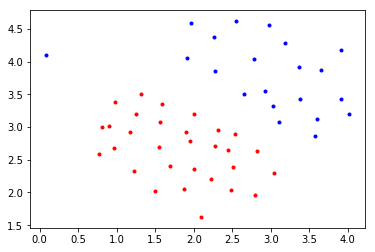

In [4]:
data = sio.loadmat('ex6data1.mat')
X = data['X']
y = data['y']

x_min = X[:,0].min() - 0.1
x_max = X[:,0].max() + 0.1
y_min = X[:,1].min() - 0.1
y_max = X[:,1].max() + 0.1

print('This data can be easily separable by a line. We will play around with the C parameter and see how it affects a linear SVM!')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(X[(y == 0).nonzero()[0], 0], X[(y == 0).nonzero()[0], 1], color='red', s=9)
ax.scatter(X[(y == 1).nonzero()[0], 0], X[(y == 1).nonzero()[0], 1], color='blue', s=9)
plt.show()


As C increases the margin shrinks and the data is fit more closely. The variance is increasing.
The decision function splits the space in the red and blue half planes, with support vectors identified with circles.


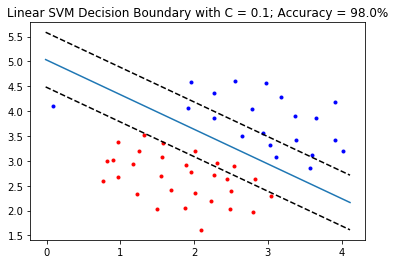

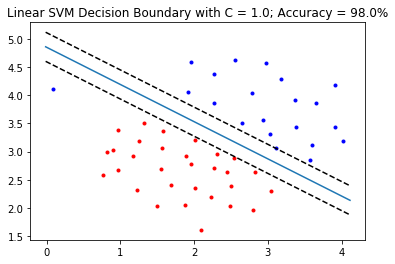

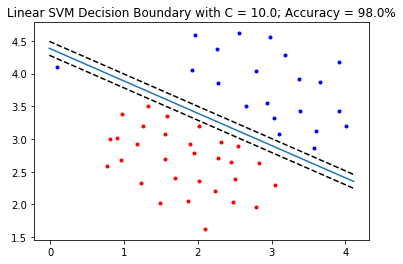

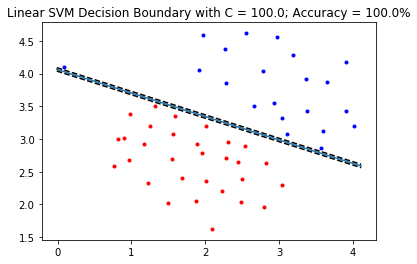

In [5]:
print('As C increases the margin shrinks and the data is fit more closely. The variance is increasing.')
print('The decision function splits the space in the red and blue half planes, with support vectors identified with circles.')

for C in [0.1, 1, 10, 100]:
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y.ravel())
    accuracy = (clf.predict(X).reshape(-1,1) == y.reshape(-1,1)).sum()/y.shape[0]
        
    # w in this case is a <2,1> vector containing theta1 and theta2, the optimized coefficients related to x1 and x2
    w = clf.coef_[0]
    # line slope
    a = -w[0] / w[1]
    # generating an x grid
    xx = np.linspace(x_min, x_max)
    # calculating the decision boundary function on the x grid
    # clf.intercept_[0] is actually equal to theta0
    yy = a * xx - (clf.intercept_[0]) / w[1]
    
    # the margin is equal to the inverse of the squared norm on theta
    # this is due to the fact that for all the support vectors (falling on the margin) the below equation holds
    # margin * (norm(theta))^2 = 1
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    
    # calculating the above and below parallels to the decision buondary to plot the margin
    yy_down = yy + a * margin
    yy_up = yy - a * margin
    
    # plot the points, the line, and the nearest vectors to the plane
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1) 
    ax.scatter(X[(y == 0).nonzero()[0], 0], X[(y == 0).nonzero()[0], 1], color='red', s=9)
    ax.scatter(X[(y == 1).nonzero()[0], 0], X[(y == 1).nonzero()[0], 1], color='blue', s=9)
    ax.plot(xx, yy, '-')
    ax.plot(xx, yy_down, 'k--')
    ax.plot(xx, yy_up, 'k--')
    plt.axis('tight')
    plt.title('Linear SVM Decision Boundary with C = %2.1f; Accuracy = %2.1f%%' % (C, accuracy*100))
    plt.show()

### Exploring the Gaussian Kernel

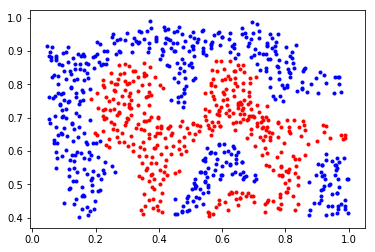

In [6]:
data = sio.loadmat('ex6data2.mat')
X = data['X']
y = data['y']

x_min = X[:,0].min() - 0.1
x_max = X[:,0].max() + 0.1
y_min = X[:,1].min() - 0.1
y_max = X[:,1].max() + 0.1

#print('This data can be easily separable by a line. We will play around with the C parameter and see how it affects a linear SVM!')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(X[(y == 0).nonzero()[0], 0], X[(y == 0).nonzero()[0], 1], color='red', s=9)
ax.scatter(X[(y == 1).nonzero()[0], 0], X[(y == 1).nonzero()[0], 1], color='blue', s=9)
plt.show()


Look at how C impacts the variance of the Gaussian Kernel in the SVM classifier


/home/pptr/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


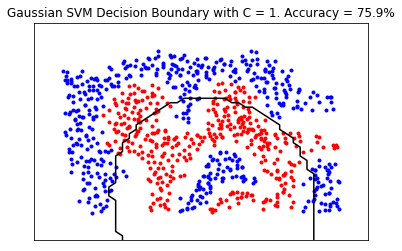

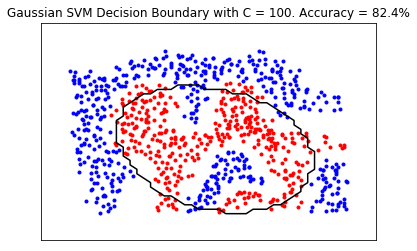

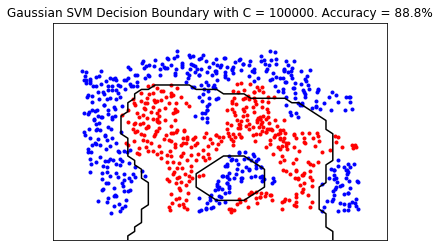

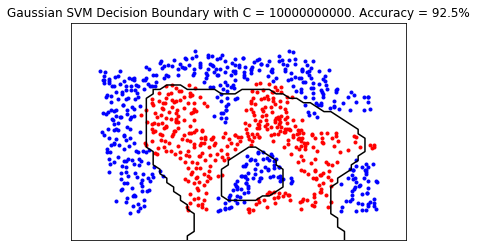

In [7]:
print('Look at how C impacts the variance of the Gaussian Kernel in the SVM classifier')

for C in [1e+0, 1e+2, 1e+5, 1e+10]:
    clf = svm.SVC(kernel='rbf', C=C, gamma = 'auto')
    clf.fit(X, y.ravel())
    accuracy = (clf.predict(X).reshape(-1,1) == y.reshape(-1,1)).sum()/y.shape[0]

    # generating an evenly spaced grid to evaluate the classifier's predictions
    xx = np.linspace(x_min, x_max)
    yy = np.linspace(y_min, y_max)
    
    z = np.zeros((len(xx), len(yy)));
    for i in np.arange(len(xx)):
        for j in np.arange(len(yy)):
            z[i,j]= clf.predict(np.c_[np.atleast_1d(xx[i]), np.atleast_1d(yy[j])])

    # plot the points, the line, and the nearest vectors to the plane
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1) 
    ax.scatter(X[(y == 0).nonzero()[0], 0], X[(y == 0).nonzero()[0], 1], color='red', s=9)
    ax.scatter(X[(y == 1).nonzero()[0], 0], X[(y == 1).nonzero()[0], 1], color='blue', s=9)

    plt.axis('tight')
    plt.title('Gaussian SVM Decision Boundary with C = %d. Accuracy = %2.1f%%' % (C, accuracy*100))

    cs = plt.contour(xx, yy, z.T, levels=[0], colors='k')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())

    plt.show()

### Select best parameter on cross validation set

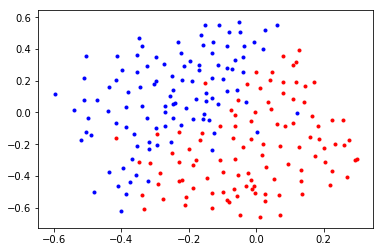

In [8]:
data = sio.loadmat('ex6data3.mat')
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']

x_min = X[:,0].min() - 0.1
x_max = X[:,0].max() + 0.1
y_min = X[:,1].min() - 0.1
y_max = X[:,1].max() + 0.1

#print('This data can be easily separable by a line. We will play around with the C parameter and see how it affects a linear SVM!')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(X[(y == 0).nonzero()[0], 0], X[(y == 0).nonzero()[0], 1], color='red', s=9)
ax.scatter(X[(y == 1).nonzero()[0], 0], X[(y == 1).nonzero()[0], 1], color='blue', s=9)
plt.show()

In [10]:
def dataset3Params(X, y, Xval, yval):
    '''
    returns the optimal C and gamma value based on a cross-validation set.
    '''
    values = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    acc_c_gamma = np.zeros((values.size * values.size, 3)) 
    pos = 0
    for i, myC in enumerate(values):
        for j, myGamma in enumerate(values):
            clf = svm.SVC(kernel='rbf', C=myC, gamma=myGamma)
            clf.fit(X, y.ravel())
            # test accuracy on validation set
            accuracy = (clf.predict(Xval).reshape(-1,1) == yval.reshape(-1,1)).sum()/yval.shape[0]
            acc_c_gamma[pos, 0] = accuracy
            acc_c_gamma[pos, 1] = myC
            acc_c_gamma[pos, 2] = myGamma
            pos += 1
    best_index = np.argmax(acc_c_gamma[:, 0])
    best_C = acc_c_gamma[best_index, 1]
    best_gamma = acc_c_gamma[best_index, 2]
    return best_C, best_gamma

In [11]:
best_C, best_gamma = dataset3Params(X, y, Xval, yval)

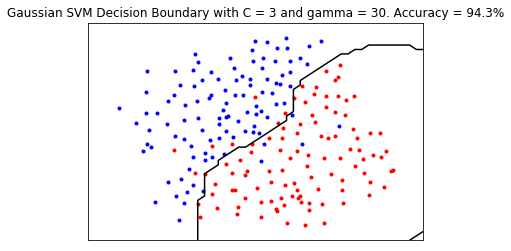

In [12]:
clf = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)
clf.fit(X, y.ravel())
accuracy = (clf.predict(X).reshape(-1,1) == y.reshape(-1,1)).sum()/y.shape[0]

# generating an evenly spaced grid to evaluate the classifier's predictions
xx = np.linspace(x_min, x_max)
yy = np.linspace(y_min, y_max)

z = np.zeros((len(xx), len(yy)));
for i in np.arange(len(xx)):
    for j in np.arange(len(yy)):
        z[i,j]= clf.predict(np.c_[np.atleast_1d(xx[i]), np.atleast_1d(yy[j])])

# plot the points, the line, and the nearest vectors to the plane
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(X[(y == 0).nonzero()[0], 0], X[(y == 0).nonzero()[0], 1], color='red', s=9)
ax.scatter(X[(y == 1).nonzero()[0], 0], X[(y == 1).nonzero()[0], 1], color='blue', s=9)

plt.axis('tight')
plt.title('Gaussian SVM Decision Boundary with C = %d and gamma = %d. Accuracy = %2.1f%%' % (best_C, best_gamma, accuracy*100))

cs = plt.contour(xx, yy, z.T, levels=[0], colors='k')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

plt.show()

## SVM eMail Spam Classifier

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the playground, we will use SVMs to build your own spam filter!

### Functions

In [7]:
import email
import os
import re, cgi
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


# reads the fixed vocabulary list in vocab.txt and returns a cell array of the words in vocabList
def get_vocabList():
    vocab = pd.read_table('vocab.txt', delim_whitespace=True, header=None)
    vocab = vocab.iloc[:,-1].values.tolist()
    return vocab
       

# preprocesses the body of an email and returns a list of indices of the words contained in the email
def process_email(file_contents):
   # read email
    with open(file_contents, 'r', encoding='ISO-8859-1') as myfile:
        processed_email = myfile.read()
        original_email = processed_email
        
    # extract body's mail
    b = email.message_from_string(processed_email)    
    if b.is_multipart():
        for payload in b.get_payload():
            # if payload.is_multipart(): ...
            processed_email = payload.get_payload()
        else:
            processed_email = b.get_payload()
            
    vocabList = get_vocabList()
    
    
    # set all character in lower case
    processed_email = str(processed_email).lower()

    # strip all HTML
    processed_email = re.sub('<[^<]+?>', '', processed_email)

    # replace any number into the string 'number'
    processed_email = re.sub('[0-9]+', 'number ', processed_email) 

    # replace strings starting with http:// or https:// with the string 'httpaddr'
    processed_email = re.sub('(http|https)://[^\s]*', 'httpaddr ', processed_email) 

    # replace email with string 'emailaddr'
    processed_email = re.sub('[^\s]+@[^\s]+', 'emailaddr ', processed_email) 

    # replace dollar sign ($) with string 'dollar'
    processed_email = re.sub('[$]+', 'dollar ', processed_email) 
    
    # delete non-alphanumeric characters
    processed_email = re.sub('[^a-zA-Z0-9]', ' ', processed_email)
    
    word_indices = np.array([])
    for word in processed_email.split():
        ps = PorterStemmer()
        # stem the word
        word = ps.stem(word)
        
        # if the word is in vocabList, insert in word_indices array the vocabList's index of that word 
        for index in range(len(vocabList)):
            if vocabList[index] == word:
                word_indices = np.append(word_indices, index)
    return word_indices, original_email, vocabList, processed_email

# takes in a word_indices vector and produces a feature vector from the word indices
def email_feature(word_indices, vocabList):
    x = np.zeros(len(vocabList))
    for index in range(len(word_indices)):
        x[int(word_indices[index])] = 1
    return x

### Training the Spam Classifier

In [42]:
train = sio.loadmat('spamTrain.mat')
X_train = train['X']
y_train = train['y']

test = sio.loadmat('spamTest.mat')
X_test = test['Xtest']
y_test = test['ytest']

C=0.1
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_train, y_train.ravel())
print("Accuracy: ", clf.score(X_test, y_test) * 100, "%")

Accuracy:  98.9 %


### Running the Spam Classifier on unseen eMails

In [29]:
non_spam = 'myEmailExample.txt'
word_indices, original_email, vocabList, processed_email = process_email(non_spam)
feature = email_feature(word_indices, vocabList)
print(original_email)
print('Classified as (1 indicates spam, 0 indicates not spam):', clf.predict(feature.reshape(-1, 1).T))

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com
Classified as (1 indicates spam, 0 indicates not spam): [0]


In [32]:
spam = 'mySpamEmailExample.txt'
word_indices, original_email, vocabList, processed_email = process_email(spam)
feature = email_feature(word_indices, vocabList)
print(original_email)
print('Classified as (1 indicates spam, 0 indicates not spam):', clf.predict(feature.reshape(-1, 1).T))

Do You Want To Make $1000 Or More Per Week?

 

If you are a motivated and qualified individual - I 
will personally demonstrate to you a system that will 
make you $1,000 per week or more! This is NOT mlm.

 

Call our 24 hour pre-recorded number to get the 
details.  

 

000-456-789

 

I need people who want to make serious money.  Make 
the call and get the facts. 

Invest 2 minutes in yourself now!

 

000-456-789

 

Looking forward to your call and I will introduce you 
to people like yourself who
are currently making $10,000 plus per week!

 

000-456-789



3484lJGv6-241lEaN9080lRmS6-271WxHo7524qiyT5-438rjUv5615hQcf0-662eiDB9057dMtVl72
Do You Want To Make $1000 Or More Per Week?

 

If you are a motivated and qualified individual - I 
will personally demonstrate to you a system that will 
make you $1,000 per week or more! This is NOT mlm.

 

Call our 24 hour pre-recorded number to get the 
details.  

 

000-456-789

 

I need people who want to make serious money.  Make 
th

### Test on spam Assasin Public Corpus dataset

In [34]:
num_email_spam = 500
num_email_non_spam = 500
num_email_train = 1000
num_of_feature = 1899



X_spam = np.zeros(shape=(num_email_spam, num_of_feature))
X_non_spam = np.zeros(shape=(num_email_non_spam, num_of_feature))
y = np.zeros(shape=(num_email_train, 1))


current_mail = 0

spam_email_dir = 'spamAssassinPublicCorpus/spamEmails/'

# load and process spam mails (500 mails)
for entry in os.scandir(spam_email_dir):
    if entry.is_file():
       # process single mail
        mail_location = spam_email_dir + entry.name
        word_indices, original_email, vocabList, processed_email = process_email(mail_location)
        feature = email_feature(word_indices, vocabList)
        X_spam[current_mail, :] = feature
        y[current_mail] = 1 # 1 because it is a spam email
        current_mail += 1

non_spam_email_dir = 'spamAssassinPublicCorpus/nonSpamEmails/'
current_mail = 0


# load and process non-spam mails (500 mails)
for entry in os.scandir(non_spam_email_dir):
    if entry.is_file():
       # process single mail
        mail_location = non_spam_email_dir + entry.name
        word_indices, original_email, vocabList, processed_email = process_email(mail_location)
        feature = email_feature(word_indices, vocabList)
        X_non_spam[current_mail, :] = feature
        current_mail += 1
        
#concatenate

X = np.concatenate((X_spam, X_non_spam))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# training
C=0.1
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_train, y_train.ravel())

train_accuracy = (clf.predict(X_train).reshape(-1,1) == y_train.reshape(-1,1)).sum()/y_train.shape[0]
test_accuracy = (clf.predict(X_test).reshape(-1,1) == y_test.reshape(-1,1)).sum()/y_test.shape[0]
print('Linear SVM Decision Boundary with C = 0.1. Train Accuracy = %2.1f%%; Test Accuracy = %2.1f%%' % (train_accuracy*100, test_accuracy*100))


Linear SVM Decision Boundary with C = 0.1. Train Accuracy = 90.0%; Test Accuracy = 91.0%


In [44]:
spam = 'myEmailExample.txt'
word_indices, original_email, vocabList, processed_email = process_email(spam)
feature = email_feature(word_indices, vocabList)
print(original_email)
print('Classified as (1 indicates spam, 0 indicates not spam):', clf.predict(feature.reshape(-1, 1).T))

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com
Classified as (1 indicates spam, 0 indicates not spam): [0]
